# Load and test pre-trained models

In [1]:
## UTILITY FUNCTION TO DISPLAY IMAGES IN THE NOTEBOOK    
def show_array(a, fmt='jpeg'):
    ''' 
    display a numpy array as an image
    supports monochrome (shape = (N,M,1) or (N,M))
    and color arrays (N,M,3)  
    '''
    import PIL.Image
    from io import BytesIO
    import IPython.display
    import numpy as np
    f = BytesIO()
    PIL.Image.fromarray(np.uint8(a).squeeze() ).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))
  

## Grayscale

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/keras/engine/saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


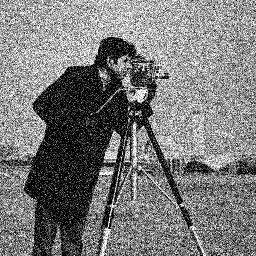

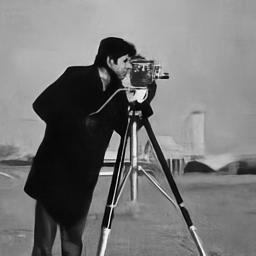

In [2]:
import numpy as np
from PIL import Image
import models
from keras.models import load_model

sigma=50

# load the model 
#m = models.DnCNN()
m = models.DnCNN_pretrained_weights(sigma, 'dncnnmodel.hdf5', verbose=False)
m = load_model('dncnnmodel.hdf5')  # reload it from the saved file



# noisy image
img_clean = np.array(Image.open('DnCNN/testsets/Set12/01.png'), dtype='float32') / 255.0
x_test = img_clean + np.random.randn(*img_clean.shape)*sigma/255
x_test = x_test.reshape(1, x_test.shape[0], x_test.shape[1], 1) 

# predict noiseless
y_predict = m.predict(x_test)

# display
show_array(x_test.clip(0,1).squeeze()*255)
show_array(y_predict.clip(0,1).squeeze()*255)

## Color

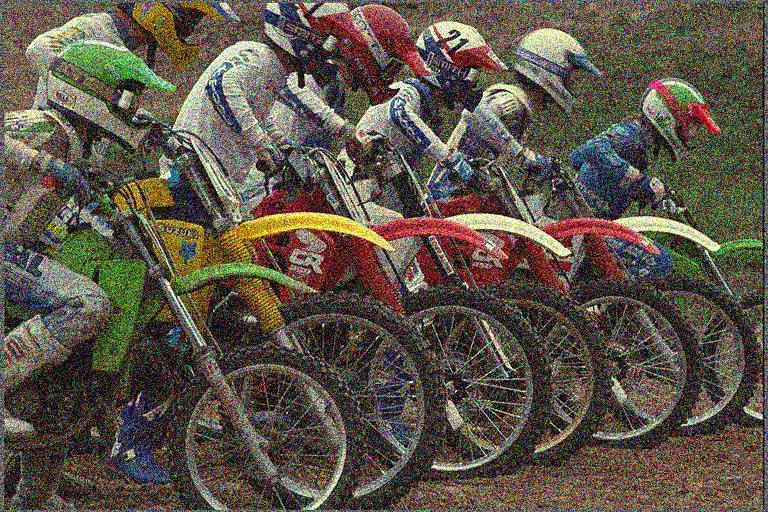

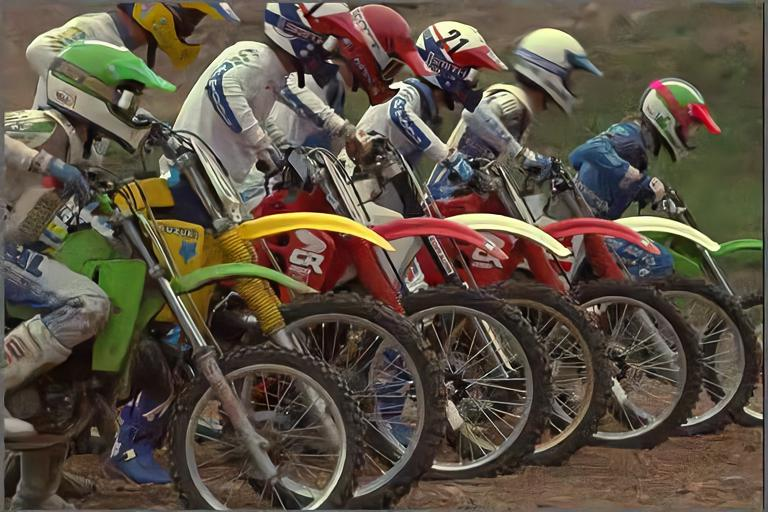

In [3]:
import numpy as np
from PIL import Image
import models

sigma=50

# load model
m = models.DnCNN_C_pretrained_weights(sigma)

# noisy image
img_clean = np.array(Image.open('DnCNN/testsets/LIVE1/bikes.bmp'), dtype='float32') / 255.0
x_test = img_clean + np.random.randn(*img_clean.shape)*sigma/255
x_test = x_test.reshape(1, x_test.shape[0], x_test.shape[1], 3) 

# predict noiseless
y_predict = m.predict(x_test)

# display
show_array(x_test.clip(0,1).squeeze()*255)
show_array(y_predict.clip(0,1).squeeze()*255)

---------------------------
[//]: # (© 2018 Gabriele Facciolo)
[//]: # (<div style="text-align:center; font-size:75%;"> Copyright © 2018 Gabriele Facciolo. All rights reserved.</div> )